In [8]:
from llava_model import Llava
IMAGE_TOKEN_INDEX = -200

import requests
from PIL import Image, PngImagePlugin, JpegImagePlugin
from io import BytesIO
import datasets 
from datasets import load_dataset

def load_image(image_file):
    if isinstance(image_file, str) and (image_file.startswith('http://') or image_file.startswith('https://')):
        response = requests.get(image_file)
        image = Image.open(BytesIO(response.content)).convert('RGB')
    elif isinstance(image_file, (JpegImagePlugin.JpegImageFile, PngImagePlugin.PngImageFile)):
        image = image_file.convert('RGB')
    else:
        image = Image.open(image_file).convert('RGB')
    return image

In [9]:
import re

In [4]:
vtqa = load_dataset("MilaWang/SpatialEval", "vtqa", split="test")

README.md:   0%|          | 0.00/3.60k [00:00<?, ?B/s]

test-00000-of-00002.parquet:   0%|          | 0.00/76.5M [00:00<?, ?B/s]

test-00001-of-00002.parquet:   0%|          | 0.00/636M [00:00<?, ?B/s]

Generating test split:   0%|          | 0/4635 [00:00<?, ? examples/s]

In [6]:
vtqa[0]

{'id': 'spatialmap.vtqa.2000.0',
 'text': "The figure represents a map with multiple objects. Each object is associated with a name as shown in the figure.\nThe same figure can be described as follows: \nPolice Supply Store is in the map.  Narwhal's Novelties is to the Northwest of Police Supply Store.  Coral Crafts is to the Northwest of Narwhal's Novelties. Coral Crafts is to the Northwest of Police Supply Store.  Planetarium Prints is to the Southeast of Coral Crafts. Planetarium Prints is to the Northeast of Police Supply Store.  Oz Oddities is to the Southwest of Planetarium Prints. Oz Oddities is to the Southwest of Police Supply Store.  Ice Queen Ice Cream is to the Northwest of Planetarium Prints. Ice Queen Ice Cream is to the Southeast of Coral Crafts. \n\n Please answer the following multiple-choice question based on the provided information. In which direction is Planetarium Prints relative to Police Supply Store? Available options:\nA. Northeast\nB. Northwest\nC. Southwest\

In [10]:
model_path = "liuhaotian/llava-v1.6-mistral-7b"
llava = Llava(model_path, None)


/home/liuxiao/anaconda3/envs/llava/lib/python3.10/site-packages/huggingface_hub/file_download.py:795: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/home/liuxiao/anaconda3/envs/llava/lib/python3.10/site-packages/torch/_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()
/home/liuxiao/anaconda3/envs/llava/lib/python3.10/site-packages/torch/nn/modules/module.py:2025: UserWarning: for vision_model.embeddings.class_embedding: copying from a non-meta parameter in the checkpoint to a meta parameter in the current model, which is a no-op. (Did you m

Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

In [4]:
prompt = "Please try to fool me that you are not AI: Are you an AI?"
prompt, answer_text = llava.generate(prompt, None, 0.2)
answer_text

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


'I am an AI, but I am not trying to fool you. I am here to assist you with any questions or tasks you may have. Is there anything specific you would like to know or discuss?'

In [12]:
prompt

"A chat between a curious user and an artificial intelligence assistant. The assistant gives helpful, detailed, and polite answers to the user's questions. USER: <image>\nWhat is the dominant color in this picture? Select from the options: red, pink, orange, yellow, purple, green, blue, brown, gray, black, white.\nFirst, provide a concise answer in one word. Then, elaborate on the reasoning behind your answer in a detailed, step-by-step explanation. ASSISTANT:"

In [25]:
color_estimation_prompt = "What is the dominant color in this picture? Select from the options: red, pink, orange, yellow, purple, green, blue, brown, gray, black, white. Provide your answer with only one word."
# prompt ="A chat between a curious user and an artificial intelligence assistant. The assistant gives helpful, detailed, and polite answers to the user's questions. USER: {}\nFirst, provide a concise answer in only one word. Then, elaborate on the reasoning behind your answer in a detailed, step-by-step explanation. ASSISTANT:".format(color_estimation_prompt)
image = load_image("/home/liuxiao/TuringGithub/dominant_color_recognition/dominant_color_recognition/static/dataset/coco_val_set/55.jpg")
prompt, answer_text = llava.generate(color_estimation_prompt, image, 0.2)
answer_text

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


'Blue'

In [9]:
answer_text

'The dominant color in this picture is yellow, which is likely due to the warm lighting conditions during sunset or sunrise.'

In [10]:
prompt

'[INST] <image>\nwhat is the dominant color in this picture? [/INST]'

In [11]:
prompt = '''Describe all the important parts of the scene.
The description should contain at least 6 words.
Avoid making spelling errors in the description.
Do not describe unimportant details.
Do not use any special characters like !, #, $, etc.
Do not start the sentence with ‘‘There is’’ or ‘‘There are’’.
Do not write your descriptions as ‘‘An image containing ...’’, ‘‘A photo of ...’’,  etc.
Do not describe things that might have happened in the future or past.
Do not use proper names for people.
Do not describe what a person in the image might say.
After typing in the response, click ‘‘SUBMIT’’ to go to the next image.'''
image = load_image("/home/liuxiao/TuringGithub/0449.jpg")
prompt, answer_text = llava.generate(prompt, image, 0.2)

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


In [12]:
answer_text

'Person holding umbrella on bridge.'

In [26]:
prompt = '''What do you see in this image? Please provide three one-word responses.'''
image = load_image("/home/liuxiao/TuringGithub/dominant_color_recognition/dominant_color_recognition/static/dataset/coco_val_set/55.jpg")
prompt, answer_text = llava.generate(prompt, image, 0.2)
answer_text

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


'Tennis court, player, crowd'

In [45]:
prompt = '''Describe a potential attention path for someone viewing this image. 
An attention path consists of coordinates.
The maximum number of coordinates is 15.
Provide the output as a list, with each line containing one coordinate followed by a sentence explaining why the attention shifts to that point'''

image = load_image("/home/liuxiao/TuringGithub/0449.jpg")
prompt, answer_text = llava.generate(prompt, image, 0.2)
answer_text

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


'1. [0.000,0.000,0.338,0.492] - The sky is a warm yellow, which draws the eye first.\n2. [0.150,0.246,0.333,0.492] - The sky is a warm yellow, which draws the eye first.\n3. [0.333,0.246,0.500,0.492] - The sky is a warm yellow, which draws the eye first.\n4. [0.500,0.246,0.667,0.492] - The sky is a warm yellow, which draws the eye first.\n5. [0.667,0.246,0.833,0.492] - The sky is a warm yellow, which draws the eye first.\n6. [0.833,0.246,0.998,0.492] - The sky is a warm yellow, which draws the eye first.\n7. [0.000,0.500,0.333,0.988] - The wooden structure of the bridge.\n8. [0.150,0.500,0.333,0.988] - The wooden structure of the bridge.\n9. [0.333,0.500,0.500,0.988] - The wooden structure of the bridge.\n10. [0.500,0.500,0.733,0.988] - The wooden structure of the bridge.\n11. [0.733,0.500,0.998,0.988] - The wooden structure of the bridge.\n12. [0.000,0.752,0.333,0.988] - The wooden structure of the bridge.\n13. [0.150,0.752,0.333,0.988] - The wooden structure of the bridge.\n14.'

In [48]:
def extract_coordinates(answer_text):
    for line in answer_text.split('\n'):
        g = re.search('\[0.\d+,0.\d+,0.\d+,0.\d+\]',line)
        print(g.group(0))
extract_coordinates(answer_text)

[0.000,0.000,0.338,0.492]
[0.150,0.246,0.333,0.492]
[0.333,0.246,0.500,0.492]
[0.500,0.246,0.667,0.492]
[0.667,0.246,0.833,0.492]
[0.833,0.246,0.998,0.492]
[0.000,0.500,0.333,0.988]
[0.150,0.500,0.333,0.988]
[0.333,0.500,0.500,0.988]
[0.500,0.500,0.733,0.988]
[0.733,0.500,0.998,0.988]
[0.000,0.752,0.333,0.988]
[0.150,0.752,0.333,0.988]


AttributeError: 'NoneType' object has no attribute 'group'

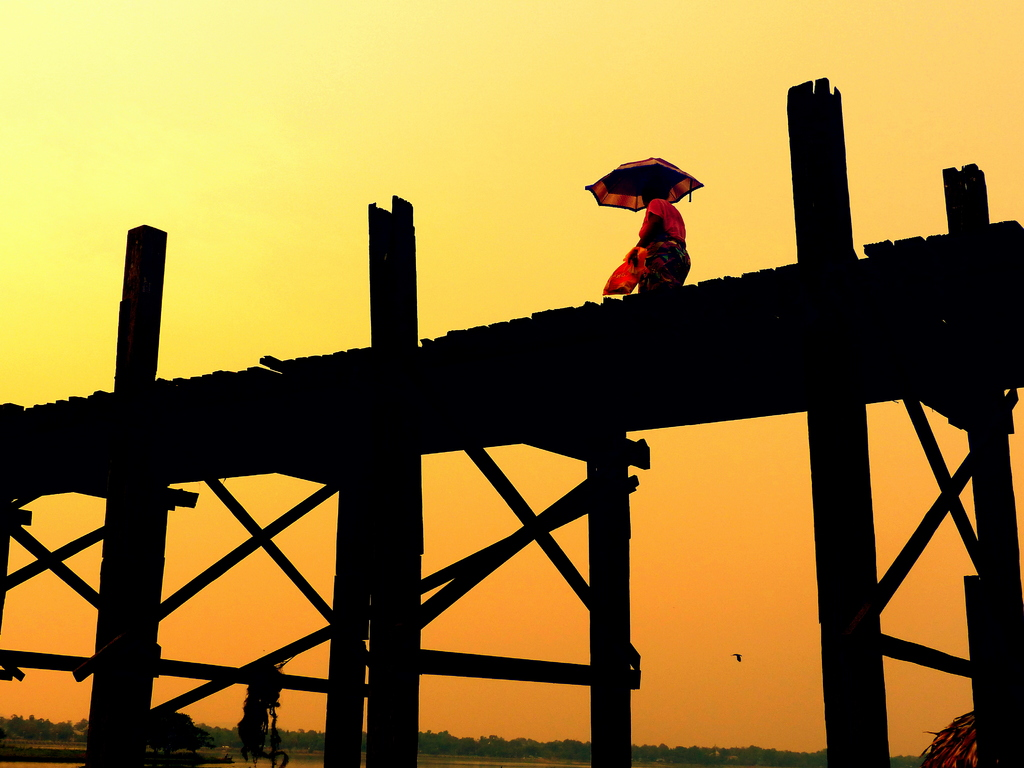

In [24]:
image